# kaggle store sales competition notebook

## exploratory notebook

visit [https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data) to download data/store-sales-time-series-forecasting/*

- holidays_events.csv,
- oil.csv,
- sample_submission.csv,
- stores.csv,
- test.csv, 
- train.csv,
- transactions.csv


In [2]:
!ls -m ../data/store-sales-time-series-forecasting/

holidays_events.csv, oil.csv, sample_submission.csv, stores.csv, test.csv, 
train.csv, transactions.csv


In [17]:
from pathlib import Path
import pandas as pd

data_dir = Path("../data/store-sales-time-series-forecasting/")

dtype = {
    'store_nbr': 'category',
    'family': 'category',
    'sales': 'float32',
    'onpromotion': 'uint64',
}

store_sales = pd.read_csv(data_dir / "train.csv", dtype=dtype, parse_dates=['date'], infer_datetime_format=True)
store_sales = store_sales.set_index('date').to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family'], append=True)
# test_df = pd.read_csv("../data/store-sales-time-series-forecasting/test.csv")
# sample_submission_df = pd.read_csv("../data/store-sales-time-series-forecasting/sample_submission.csv")
# stores_df = pd.read_csv("../data/store-sales-time-series-forecasting/stores.csv")
# oil_df = pd.read_csv("../data/store-sales-time-series-forecasting/oil.csv")
# holiday_events = pd.read_csv("../data/store-sales-time-series-forecasting/holidays_events.csv")

In [18]:
print(f"""
train_df: {len(store_sales)}
""")


train_df: 3000888



In [19]:
average_sales = store_sales.groupby('date').mean()['sales']
average_sales

date
2013-01-01      1.409438
2013-01-02    278.390808
2013-01-03    202.840195
2013-01-04    198.911148
2013-01-05    267.873230
                 ...    
2017-08-11    463.733856
2017-08-12    444.798279
2017-08-13    485.768616
2017-08-14    427.004730
2017-08-15    427.980896
Freq: D, Name: sales, Length: 1684, dtype: float32

### Fit a time-step feature

In [20]:
from sklearn.linear_model import LinearRegression
import numpy as np

df = average_sales.to_frame()

time = np.arange(len(df.index))
df['time'] = time

X = df.loc[:, ['time']]
y = df.loc[:, 'sales']

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

y_pred

date
2013-01-01    194.232790
2013-01-02    194.427137
2013-01-03    194.621484
2013-01-04    194.815831
2013-01-05    195.010178
                 ...    
2017-08-11    520.541320
2017-08-12    520.735667
2017-08-13    520.930014
2017-08-14    521.124361
2017-08-15    521.318708
Freq: D, Length: 1684, dtype: float64

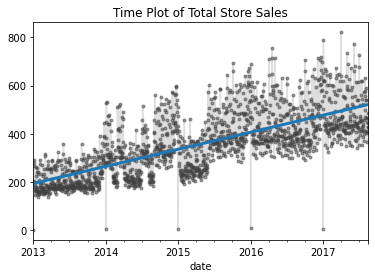

In [21]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
ax = y.plot(**plot_params, alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Total Store Sales');

### Fit a lag feature to store sales

In [22]:
from sklearn.linear_model import LinearRegression

df = average_sales.to_frame()

lag_1 = df['sales'].shift(1)

df['lag_1'] = lag_1

X = df.loc[:, ['lag_1']].dropna()
y = df.loc[:, 'sales']
y, X = y.align(X, join='inner')

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

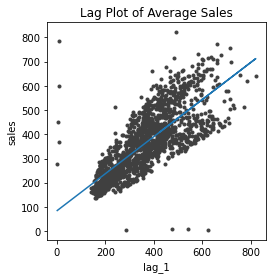

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
ax.plot(X['lag_1'], y_pred)
ax.set(aspect='equal', ylabel='sales', xlabel='lag_1', title='Lag Plot of Average Sales');